# Loading Json Data

In [1]:
import pandas as pd
df_loaded = pd.read_json("dataset.json", orient="records", lines=True)
df_loaded.head()


,Starts,Stops,Strength,Size,data,confidence,Split
0,176021,176120,strong,Large,"[2.6, 2.6, 2.6, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ...",low,Train
1,78674,78768,strong,Large,"[2.8, 2.8, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, ...",low,Train
2,174111,174223,strong,Large,"[2.6, 2.6, 2.6, 2.6, 2.6, 2.5, 2.5, 2.5, 2.5, ...",low,Train
3,11499,11575,weak,Small,"[2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.6, ...",high,Train
4,162894,163029,regular,Large,"[2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.5, 2.5, ...",low,Train


## Helper

In [2]:
size_categories = ["Small", "Medium", "Large"]
strength_categories = ["weak", "regular", "strong", "very Strong"]

# Mapping for size categories
size_to_int = {size: idx for idx, size in enumerate(size_categories)}
int_to_size = {idx: size for size, idx in size_to_int.items()}

# Mapping for strength categories
strength_to_int = {strength: idx for idx, strength in enumerate(strength_categories)}
int_to_strength = {idx: strength for strength, idx in strength_to_int.items()}

# Example usage
print(size_to_int)         # {'Small': 0, 'Medium': 1, 'Large': 2}
print(int_to_size)         # {0: 'Small', 1: 'Medium', 2: 'Large'}
print(strength_to_int)     # {'weak': 0, 'regular': 1, 'strong': 2, 'very Strong': 3}
print(int_to_strength)     # {0: 'weak', 1: 'regular', 2: 'strong', 3: 'very Strong'}

{'Small': 0, 'Medium': 1, 'Large': 2}
{0: 'Small', 1: 'Medium', 2: 'Large'}
{'weak': 0, 'regular': 1, 'strong': 2, 'very Strong': 3}
{0: 'weak', 1: 'regular', 2: 'strong', 3: 'very Strong'}


## Visualize

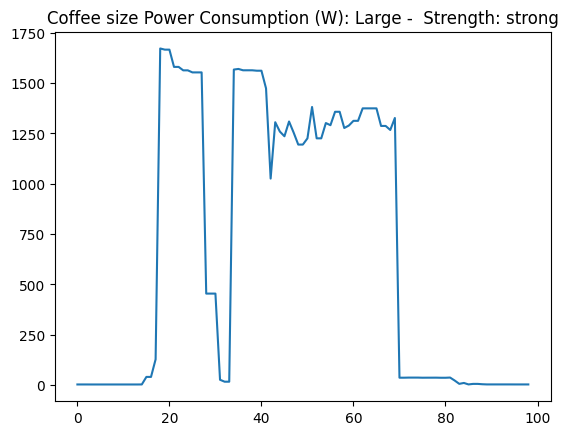

In [3]:
import matplotlib.pyplot as plt
sample = df_loaded.iloc[0]
plt.plot(sample["data"])
plt.title(f"Coffee ")
plt.title(f"Coffee size Power Consumption (W): {sample['Size']} -  Strength: {sample['Strength']}")
plt.show()

## Raw Data

In [10]:
raw  = pd.read_csv("./combined.csv")
raw.iloc[sample["Starts"]:sample["Stops"]]

,timestamp,Power (W)
176021,2025-02-27 11:02:58,2.6
176022,2025-02-27 11:03:02,2.6
176023,2025-02-27 11:03:02,2.6
176024,2025-02-27 11:03:02,2.5
176025,2025-02-27 11:03:06,2.5
...,...,...
176115,2025-02-27 11:04:46,2.8
176116,2025-02-27 11:04:46,2.7
176117,2025-02-27 11:04:47,2.7
176118,2025-02-27 11:04:47,2.7


# Submission

In [14]:
# Overwrite Strength and Size entries
df_loaded.iloc[-1, df_loaded.columns.get_loc("Strength")] = "strong"
df_loaded.iloc[-1, df_loaded.columns.get_loc("Size")] = "medium"
df_loaded.to_json("solution.json", orient="records", lines=True)
